In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
gc.collect()


chunksize=10
missing_values=["Nan","na","NA","-","--"]

my_list=[]

for chunk in pd.read_csv(r'C:\Users\adfatwan\Downloads\game of thrones.csv', chunksize=chunksize,na_values=missing_values):
    my_list.append(chunk)
    
dataset=pd.concat(my_list,axis=0)
print(len(dataset))
    


73


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No. overall             73 non-null     int64  
 1   No. in season           73 non-null     int64  
 2   Season                  73 non-null     int64  
 3   Title                   73 non-null     object 
 4   Directed by             73 non-null     object 
 5   Written by              73 non-null     object 
 6   Novel(s) adapted        73 non-null     object 
 7   Original air date       61 non-null     object 
 8   U.S. viewers(millions)  70 non-null     float64
 9   Imdb rating             73 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 5.8+ KB


In [78]:
dataset.head(2)   # Observation of data

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.20,8.8


In [79]:
# Checking misiing values
dataset.isna().sum()   # We have Nulls in 2 columns


No. overall                0
No. in season              0
Season                     0
Title                      0
Directed by                0
Written by                 0
Novel(s) adapted           0
Original air date         12
U.S. viewers(millions)     3
Imdb rating                0
dtype: int64

In [80]:
# Fixing Missing values for column -- Original air date 
dataset.loc[dataset["No. overall"]==7, ["Original air date"]]= "29-May-11"
dataset.loc[dataset["No. overall"]==12, ["Original air date"]]= "08-Apr-12"
dataset.loc[dataset["No. overall"]==13, ["Original air date"]]= "15-Apr-12"
dataset.loc[dataset["No. overall"]==17, ["Original air date"]]= "13-Apr-12"
dataset.loc[dataset["No. overall"]==27, ["Original air date"]]= "12-May-13"
dataset.loc[dataset["No. overall"]==37, ["Original air date"]]= "18-May-14"
dataset.loc[dataset["No. overall"]==47, ["Original air date"]]= "24-May-15"
dataset.loc[dataset["No. overall"]==48, ["Original air date"]]= "31-May-15"
dataset.loc[dataset["No. overall"]==55, ["Original air date"]]= "22-May-16"
dataset.loc[dataset["No. overall"]==56, ["Original air date"]]= "29-May-16" # CORRECTION OF WRONG DATA
dataset.loc[dataset["No. overall"]==61, ["Original air date"]]= "16-Jul-17"
dataset.loc[dataset["No. overall"]==68, ["Original air date"]]= "14-Apr-19"
dataset.loc[dataset["No. overall"]==69, ["Original air date"]]= "21-Apr-19"



In [81]:
# Fixing Missing values for column -- U.S. viewers(millions) 
# Repalcing using mean
S3=dataset[(dataset["Season"]==3)] 
mean1=S3["U.S. viewers(millions)"].mean()
dataset.loc[(dataset["No. overall"]==27), ["U.S. viewers(millions)"]]= mean1  # .fillna(mean,inplace=True)

S4=dataset[(dataset["Season"]==4)] 
mean2=S4["U.S. viewers(millions)"].mean()
dataset.loc[(dataset["No. overall"]==39), ["U.S. viewers(millions)"]]= mean2  # .fillna(mean,inplace=True)

S6=dataset[(dataset["Season"]==6)]   #3, 4, 6
mean3=S6["U.S. viewers(millions)"].mean()
dataset.loc[(dataset["No. overall"]==56), ["U.S. viewers(millions)"]]= mean3  # .fillna(mean,inplace=True)


In [82]:
# Check nulls again
dataset.isna().sum()   # We have Nulls in 2 columns

No. overall               0
No. in season             0
Season                    0
Title                     0
Directed by               0
Written by                0
Novel(s) adapted          0
Original air date         0
U.S. viewers(millions)    0
Imdb rating               0
dtype: int64

Text(0, 0.5, 'No. Of Episodes')

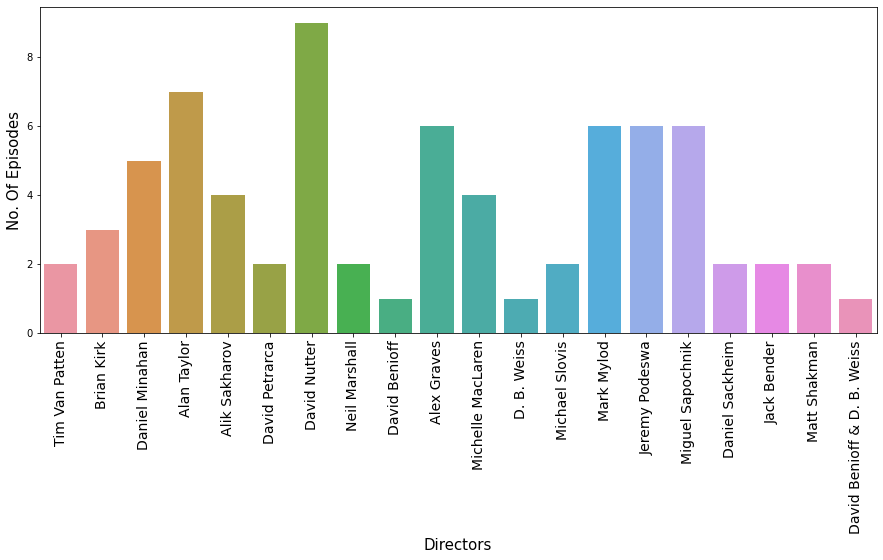

In [93]:
# No of episodes directed by whom to see the frequency
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(data=dataset, x="Directed by")
plt.xticks(rotation=90,fontsize=14)
plt.xlabel("Directors", fontsize=15)
plt.ylabel("No. Of Episodes", fontsize=15)


Text(0, 0.5, 'No. Of Episodes')

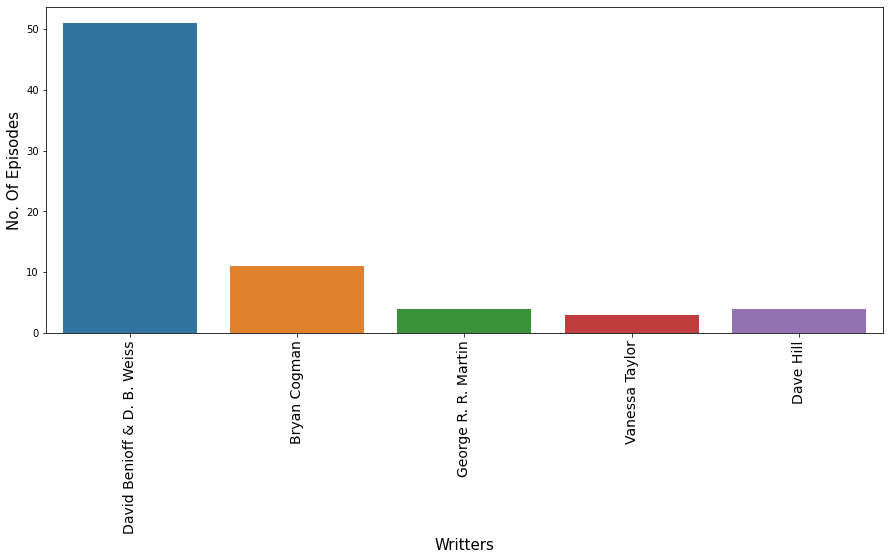

In [95]:
# No of episodes written by whom to see the frequency
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(data=dataset, x="Written by")
plt.xticks(rotation=90,fontsize=14)
plt.xlabel("Writters", fontsize=15)
plt.ylabel("No. Of Episodes", fontsize=15)

Text(0.5, 1.0, 'Most watched season was Season 7 with highest viewers and lowest imdb rating')

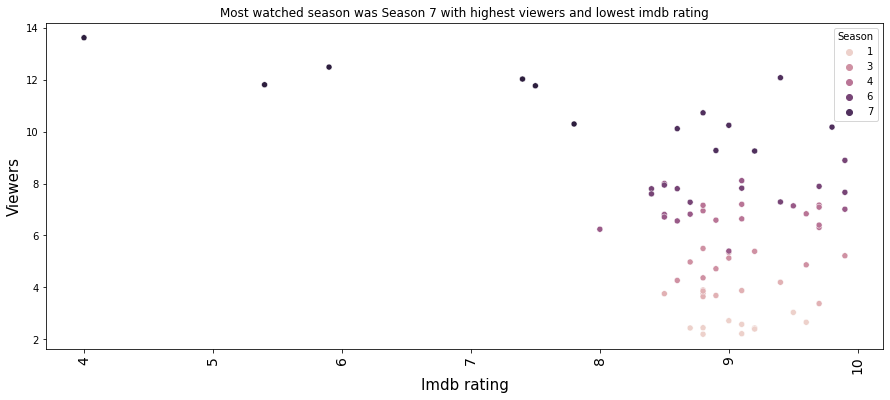

In [102]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.scatterplot(data=dataset, x="Imdb rating", y="U.S. viewers(millions)", hue="Season")
plt.xticks(rotation=90,fontsize=14)
plt.xlabel("Imdb rating", fontsize=15)
plt.ylabel("Viewers", fontsize=15)
plt.title("Most watched season was Season 7 with highest viewers and lowest imdb rating")

In [103]:
dataset.nlargest(1,"U.S. viewers(millions)")  #### Most Viewed episode

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
72,73,6,8,"""The Iron Throne""",David Benioff & D. B. Weiss,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,19-May-19,13.61,4.0


In [104]:
dataset.nsmallest(1,"U.S. viewers(millions)")  #### Least Viewed episode

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.2,8.8


In [106]:
dataset.nlargest(1,"Imdb rating")  #### Highest rated episode

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
28,29,9,3,"""The Rains of Castamere""",David Nutter,David Benioff & D. B. Weiss,A Storm of Swords,2-Jun-13,5.22,9.9


In [107]:
dataset.nsmallest(1,"Imdb rating")  #### Highest rated episode


,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
72,73,6,8,"""The Iron Throne""",David Benioff & D. B. Weiss,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,19-May-19,13.61,4.0


In [125]:
# Most viewed season
dataset_season=dataset.groupby("Season")
dataset_views= dataset_season.sum("U.S. viewers(millions)")
dataset_views.nlargest(1,"U.S. viewers(millions)")

,No. overall,No. in season,U.S. viewers(millions),Imdb rating
Season,,,,
6,555,55,77.966667,90.6


In [127]:
# Least viewed season
dataset_views.nsmallest(1,"U.S. viewers(millions)")

,No. overall,No. in season,U.S. viewers(millions),Imdb rating
Season,,,,
1,55,55,25.15,91.0


In [130]:
# Largest rated season
dataset_views.nlargest(1, "Imdb rating")

,No. overall,No. in season,U.S. viewers(millions),Imdb rating
Season,,,,
4,355,55,68.344444,93.1


In [131]:
# least rated season
dataset_views.nsmallest(1, "Imdb rating")

,No. overall,No. in season,U.S. viewers(millions),Imdb rating
Season,,,,
8,423,21,71.96,38.0


Text(0.5, 1.0, 'Season vs Episode')

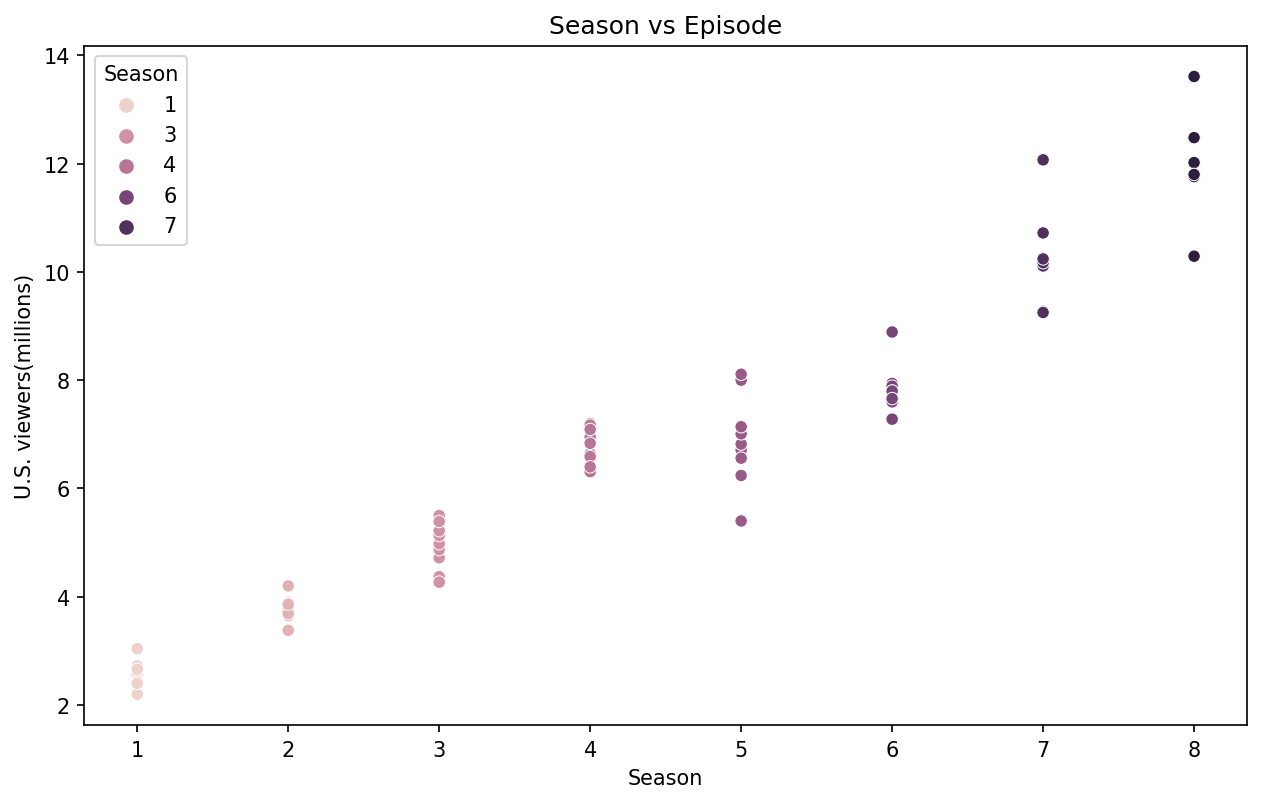

In [138]:
fig, ax = plt.subplots(figsize=(10,6),dpi=150)
sns.scatterplot(data=dataset, x="Season", y="U.S. viewers(millions)", hue='Season')
plt.title("Season vs Episode")
# with every episode Viewers have increased

In [139]:
dataset

,No. overall,No. in season,Season,Title,Directed by,Written by,Novel(s) adapted,Original air date,U.S. viewers(millions),Imdb rating
0,1,1,1,"""Winter Is Coming""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,17-Apr-11,2.22,9.1
1,2,2,1,"""The Kingsroad""",Tim Van Patten,David Benioff & D. B. Weiss,A Game of Thrones,24-Apr-11,2.20,8.8
2,3,3,1,"""Lord Snow""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,1-May-11,2.44,8.7
3,4,4,1,"""Cripples, Bastards, and Broken Things""",Brian Kirk,Bryan Cogman,A Game of Thrones,8-May-11,2.45,8.8
4,5,5,1,"""The Wolf and the Lion""",Brian Kirk,David Benioff & D. B. Weiss,A Game of Thrones,15-May-11,2.58,9.1
...,...,...,...,...,...,...,...,...,...,...
68,69,2,8,"""A Knight of the Seven Kingdoms""",David Nutter,Bryan Cogman,Outline from A Dream of Spring and original co...,21-Apr-19,10.29,7.8
69,70,3,8,"""The Long Night""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,28-Apr-19,12.02,7.4
70,71,4,8,"""The Last of the Starks""",David Nutter,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,5-May-19,11.80,5.4
71,72,5,8,"""The Bells""",Miguel Sapochnik,David Benioff & D. B. Weiss,Outline from A Dream of Spring and original co...,12-May-19,12.48,5.9
